In [1]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from haversine import haversine
from geopy.distance import geodesic

In [3]:
data=pd.read_csv('data/site-optus-melbCBD.csv')
data.head()

,SITE_ID,LATITUDE,LONGITUDE,NAME,STATE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION,HCIS_L2
0,10003026,-37.81517,144.97476,Spring and Flinders ucell Optus North West cor...,VIC,2,NaN,Within 10 meters,NaN,KX3P
1,10003027,-37.81524,144.95256,Optus Minicell - Lon_Spencer Corner Spencer an...,VIC,2,NaN,Within 10 meters,NaN,KX3P
2,10003238,-37.81239,144.97120,136 Exhibition St MELBOURNE,VIC,2,NaN,Within 10 meters,NaN,KX3P
3,10004167,-37.81679,144.96918,Federation Square North -V 164A Flinders Stree...,VIC,2,NaN,Within 10 meters,NaN,KX3P
4,10004576,-37.81808,144.95692,KING ST (3144 REPLACEMENT) -V 530 Collins Stre...,VIC,2,NaN,Within 10 meters,NaN,KX3P


In [4]:
'''
纬度:latitude:y轴;
经度:longitude:x轴;
'''
data=data[['SITE_ID', 'LATITUDE', 'LONGITUDE']]
data.head()

,SITE_ID,LATITUDE,LONGITUDE
0,10003026,-37.81517,144.97476
1,10003027,-37.81524,144.95256
2,10003238,-37.81239,144.97120
3,10004167,-37.81679,144.96918
4,10004576,-37.81808,144.95692


In [5]:
len(data)

125

In [6]:
geodesic((-37.81517, 144.97476), (-37.81524, 144.95256)).kilometers

1.9547788468100997

In [7]:
geodesic((-37.81517, 144.97476), (-37.81524, 144.95256)).meters

1954.7788468100998

In [8]:
haversine((-37.81517, 144.97476), (-37.81524, 144.95256))

1.9501359198146078

In [9]:
'''
1.内网全连通;
2.全网全连通;
3.覆盖范围越大->数据传输速率(带宽)越小;
'''
latitude=data.LATITUDE.to_numpy()
longitude=data.LONGITUDE.to_numpy()
result=np.stack((latitude, longitude), axis=1)
result

array([[-37.81517 , 144.97476 ],
       [-37.81524 , 144.95256 ],
       [-37.81239 , 144.9712  ],
       [-37.81679 , 144.96918 ],
       [-37.81808 , 144.95692 ],
       [-37.811269, 144.957909],
       [-37.809081, 144.96893 ],
       [-37.815461, 144.962656],
       [-37.81285 , 144.955026],
       [-37.816356, 144.962313],
       [-37.818071, 144.957211],
       [-37.818202, 144.954367],
       [-37.814225, 144.971971],
       [-37.815975, 144.955905],
       [-37.815493, 144.956714],
       [-37.81852 , 144.957141],
       [-37.817303, 144.962344],
       [-37.818162, 144.959934],
       [-37.813381, 144.959612],
       [-37.812084, 144.967997],
       [-37.818494, 144.957705],
       [-37.812122, 144.97071 ],
       [-37.811625, 144.964919],
       [-37.814263, 144.972105],
       [-37.815549, 144.966686],
       [-37.818166, 144.964831],
       [-37.817384, 144.959217],
       [-37.814896, 144.971668],
       [-37.811126, 144.962116],
       [-37.818656, 144.956626],
       [-3

In [10]:
'''
基站分类:
Sub-1 GHz: 1000m/1.0Gbps/18
Sub-6 GHz: 500m/2.0Gbps/36
mmWave 24Ghz: 250m/4.0Gbps/71
'''
maxDis=0 #每个基站都可以连通另外一个基站的最小距离
maxLen=0 #两个基站之间距离的最大值
for i in np.arange(125):
    tmp=-1
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis>maxLen:
            maxLen=dis
        if tmp==-1 or dis<tmp:
            tmp=dis
    print(i, "->", tmp)
    if tmp>maxDis:
        maxDis=tmp
print(maxDis)
print(maxLen)

0 -> 31.03071784980142
1 -> 205.00570949263093
2 -> 46.37817293729289
3 -> 159.00505377406242
4 -> 25.64172339553857
5 -> 119.85342801366819
6 -> 155.36100879491565
7 -> 40.36790069422061
8 -> 30.469219688402585
9 -> 36.071287958179425
10 -> 25.64172339553857
11 -> 100.51982836419096
12 -> 12.53035543622776
13 -> 89.08630317302807
14 -> 79.76406439803073
15 -> 30.021633105099923
16 -> 15.761690734967804
17 -> 68.16962805418721
18 -> 58.6874238021205
19 -> 87.30943903056338
20 -> 49.743125044732395
21 -> 11.719290640006502
22 -> 12.065804168253115
23 -> 12.53035543622776
24 -> 13.910134434007041
25 -> 26.41938482750559
26 -> 14.095556620792072
27 -> 70.05255956373946
28 -> 55.89504324749431
29 -> 25.621636788902304
30 -> 15.761690734967804
31 -> 16.08129881606448
32 -> 42.64065885554471
33 -> 17.046797484253908
34 -> 20.498782171172994
35 -> 144.5397077387075
36 -> 111.826278333951
37 -> 34.40455594003578
38 -> 129.59044782662616
39 -> 22.168416616571278
40 -> 48.15138466073732
41 -> 22

In [78]:
nums=np.arange(125)
np.random.shuffle(nums)
sub_1=nums[:18]
sub_6=nums[18:18+36]
mmWave_24=nums[18+36:]

In [9]:
sub_1

array([ 30,  89,  52,  57,  93,  53,   1,  56,  12, 116,  38,  50,  86,
        76,  84,  28,  22,  98])

In [136]:
len(sub_1)

18

In [10]:
sub_6

array([103,  54, 108,  45,  95,  36,  58,  14,   6,  11,   0,  96,  88,
        25, 104, 113,  80,  81,  94,   7,  31,  92, 115,  39,  21,  72,
         4,   9, 105,  85,  37,  63, 107,  17,  79,  26])

In [138]:
len(sub_6)

36

In [11]:
mmWave_24

array([ 32,  55, 124, 118, 101,   3, 106,  97,  66,  19,  68,  13, 122,
        70,  23,  59,  15,  47,  10,  87, 102,  65,  29,   2,  73,   5,
        75, 114, 117,  77,  33,  35,  60,   8,  46, 111, 112,  71,  43,
        61,  27,  51,  69, 121,  90,  16,  41,  64,  67,  34,  99, 120,
       123,  62, 100,  74, 109,  42, 119,  48,  78,  24,  83, 110,  20,
        44,  91,  40,  82,  18,  49])

In [140]:
len(mmWave_24)

71

In [144]:
len({key: None for key in sub_1} | {key: None for key in sub_6} | {key: None for key in mmWave_24})

125

In [11]:
sub_1 = np.array([30, 89, 52, 57, 93, 53, 1, 56, 12, 116, 38, 50, 86, 76, 84, 28, 22, 98])
sub_6 = np.array([103, 54, 108, 45, 95, 36, 58, 14, 6, 11, 0, 96, 88, 25, 104, 113, 80, 81, 94, 7, 31, 92, 115, 39, 21, 72, 4, 9, 105, 85, 37, 63, 107, 17, 79, 26])
mmWave_24 = np.array([
    32, 55, 124, 118, 101, 3, 106, 97, 66, 19, 68, 13, 122, 70, 23, 59, 15, 47,
    10, 87, 102, 65, 29, 2, 73, 5, 75, 114, 117, 77, 33, 35, 60, 8, 46, 111,
    112, 71, 43, 61, 27, 51, 69, 121, 90, 16, 41, 64, 67, 34, 99, 120, 123, 62,
    100, 74, 109, 42, 119, 48, 78, 24, 83, 110, 20, 44, 91, 40, 82, 18, 49])

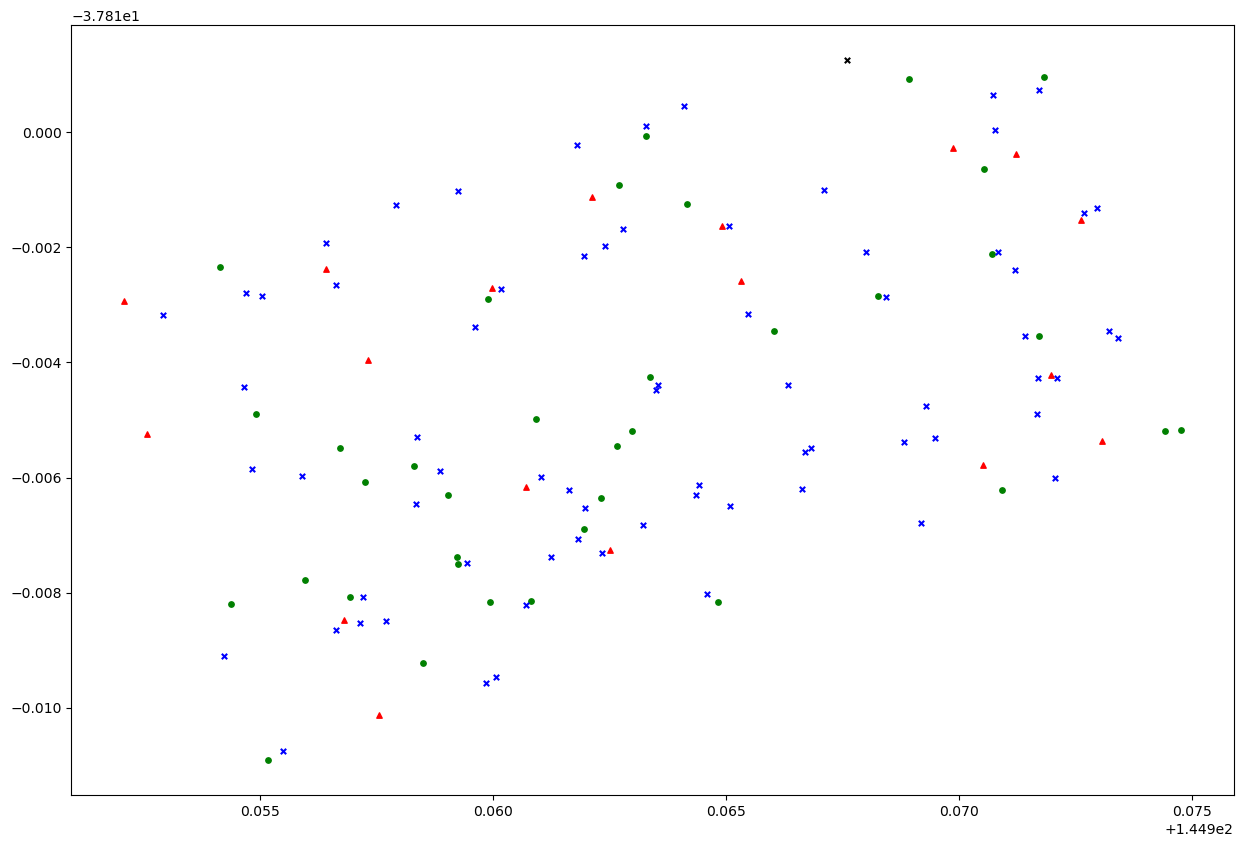

In [36]:
x=[]
y=[]
plt.figure(figsize=(15, 10))
for s1 in sub_1:
    x.append(result[s1][0])
    y.append(result[s1][1])
plt.scatter(np.array(y), np.array(x), color='red', s=15, marker='^')
x=[]
y=[]
for s6 in sub_6:
    x.append(result[s6][0])
    y.append(result[s6][1])
plt.scatter(np.array(y), np.array(x), color='green', s=15, marker='o')
x=[]
y=[]
for s24 in mmWave_24:
    x.append(result[s24][0])
    y.append(result[s24][1])
plt.scatter(np.array(y), np.array(x), color='blue', s=15, marker='x')
#特殊点->82 75 114 117 101
#plt.scatter([result[82][1]], [result[82][0]], color='yellow', s=20, marker='.')
#plt.scatter([result[75][1]], [result[75][0]], color='yellow', s=20, marker='.')
#plt.scatter([result[114][1]], [result[114][0]], color='yellow', s=20, marker='.')
#plt.scatter([result[117][1]], [result[117][0]], color='yellow', s=20, marker='.')
#plt.scatter([result[101][1]], [result[101][0]], color='yellow', s=20, marker='.')
#plt.scatter(longitude[575], latitude[575], color='black', s=15, marker='x')
plt.show()

In [42]:
G=nx.DiGraph()
G.add_edge(0, 1)
G.add_edge(1, 2)
#nx.is_strongly_connected(G)
G.number_of_edges()

2

In [51]:
G=nx.DiGraph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 0)
G.add_edge(3, 4)
nx.is_strongly_connected(G)

False

In [13]:
#sub_1类基站是否全连通
G=nx.DiGraph()
for i in sub_1:
    for j in sub_1:
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=1000:
            print(i, j, dis)
            G.add_edge(i,j)
    print("========")
print(G.number_of_nodes())
print(G.number_of_edges())
nx.is_strongly_connected(G)

30 89 520.4759995138758
30 52 722.8080743944303
30 57 200.89601161749994
30 93 953.2755611867572
30 53 575.2510026274254
30 1 904.796548984181
30 56 587.172451298592
30 12 898.2226223385738
30 38 540.2442248489305
30 76 552.4689250016872
30 28 681.8475875441969
30 22 660.4008333391929
30 98 763.7749259212796
89 30 520.4759995138758
89 57 429.0222548161431
89 53 994.7920131638973
89 1 518.2212030702086
89 56 502.5905609207882
89 38 194.48644791996918
89 76 697.7603703263597
89 84 742.6730605607943
89 28 940.1384517033964
89 98 677.4322747104117
52 30 722.8080743944303
52 57 864.1161837568989
52 93 230.5640698634108
52 53 579.0006246982525
52 12 215.10170602359696
52 116 613.9816560535952
52 50 602.107634427098
52 86 506.2418249165868
52 76 988.2598231577674
52 28 901.4119444923632
52 22 674.2201246519296
57 30 200.89601161749994
57 89 429.0222548161431
57 52 864.1161837568989
57 53 567.9119393654512
57 1 724.4710583572115
57 56 386.32476772420387
57 38 520.3822635866524
57 76 388.028084

True

In [14]:
#sub_6类基站是否全连通
G=nx.DiGraph()
for i in sub_6:
    for j in sub_6:
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=500:
            print(i, j, dis)
            G.add_edge(i,j)
    print("========")
print(G.number_of_nodes())
print(G.number_of_edges())
nx.is_strongly_connected(G)

103 108 338.4151904918134
103 6 223.4525455650645
103 81 211.00207125214487
103 31 316.8021645126009
103 21 165.10947154112012
54 95 157.56213314849717
54 36 343.3860642544814
54 58 220.86853292607682
54 14 79.76406439803073
54 11 347.2968583919886
54 96 243.33062047196023
54 88 96.68049412330805
54 113 366.04361749740997
54 94 389.0831403445234
54 7 480.4343898143289
54 39 421.4093721880526
54 4 225.02596598132027
54 9 446.5807120043973
54 85 496.5381910322387
54 107 424.011071717599
54 17 331.0581990336551
54 79 236.7112829829894
54 26 226.1537648177892
108 103 338.4151904918134
108 0 323.8730088798229
108 31 314.1642599846291
108 92 300.3823587294777
108 115 304.36256519891464
108 21 180.61659519389553
45 95 368.7219658278672
45 36 183.01225106036338
45 88 416.94249131400363
45 25 368.1296837887069
45 104 476.2433963700777
45 80 110.01291436286617
45 94 379.13816741829675
45 7 40.36790069422061
45 39 372.4830160527501
45 72 450.1691869157884
45 9 141.1512147192317
45 63 331.94900656

True

In [15]:
#mmWave类基站是否全连通
G=nx.DiGraph()
for i in mmWave_24:
    for j in mmWave_24:
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=250:
            print(i, j, dis)
            G.add_edge(i,j)
    print("========")
print(G.number_of_nodes())
print(G.number_of_edges())
nx.is_strongly_connected(G)

32 33 212.57790607805558
32 61 238.14288224774668
32 69 201.98571024997267
32 119 42.64065885554471
32 44 245.39769159015765
32 40 48.15138466073732
55 111 248.49374493813994
55 112 155.87401029805193
55 90 245.05274425205317
55 64 128.86498900257143
55 67 202.5710184421255
55 78 245.58977492977277
55 24 131.7550974639122
124 8 189.0061592026893
124 46 161.09293426518954
124 49 206.75419065898254
118 5 119.85342801366819
118 33 205.79459205509778
118 69 242.89913511452323
101 75 86.81280524402132
101 74 68.18669149767788
3 65 224.95452074725088
3 67 233.36062206244992
3 100 166.43401999436318
3 78 159.00505377406242
106 66 178.89393383254543
106 87 249.86651784381374
106 102 26.893430449496414
106 2 170.0710819373021
106 34 234.17066033129
106 74 230.0306443458482
97 122 239.40953634343145
97 77 46.08658049506769
97 43 237.5451589610388
97 16 136.53423057398678
97 99 154.3924195960987
97 123 135.41845545705579
97 62 245.50080753179185
97 42 96.95490005857206
97 83 239.1213165118993
97 

True

In [16]:
#全网全连通
G=nx.DiGraph()
for i in sub_1:
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=1000:
            print(i, j, dis)
            G.add_edge(i,j)
    print("========")
for i in sub_6:
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=500:
            print(i, j, dis)
            G.add_edge(i,j)
    print("========")
for i in mmWave_24:
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=250:
            print(i, j, dis)
            G.add_edge(i,j)
    print("========")
print(G.number_of_nodes())
print(G.number_of_edges())
nx.is_strongly_connected(G)

30 1 904.796548984181
30 2 936.5493969158512
30 3 589.1787517937893
30 4 500.9535417900164
30 5 778.97919967664
30 7 200.17278912386044
30 8 821.3043181472102
30 9 102.01120334625482
30 10 475.5894192212543
30 11 724.9893093792223
30 12 898.2226223385738
30 13 599.2626088543492
30 14 547.1824630875693
30 15 493.37948882879493
30 16 15.761690734967804
30 17 248.28620722159445
30 18 500.8005805653125
30 19 750.4553121830511
30 20 445.07933306550404
30 21 919.8079236283016
30 22 660.4008333391929
30 23 907.6155474455502
30 24 413.5069378670843
30 25 227.31984990155996
30 26 290.7092793519907
30 27 847.6056431440629
30 28 681.8475875441969
30 29 541.145418429918
30 31 703.612599316829
30 32 586.4824919431242
30 33 544.5673606495756
30 35 803.853343127713
30 36 289.16188835074394
30 37 764.1866644138687
30 38 540.2442248489305
30 39 536.6472354874492
30 40 620.1229139617805
30 41 347.96999556557626
30 42 64.1344925777987
30 43 191.52380030040536
30 44 821.4940966730902
30 45 232.67565199684

True

In [17]:
G=nx.DiGraph()

def cross_net(sub, len):
    for i in sub:
        for j in np.arange(125):
            if i==j:
                continue
            dis=geodesic(result[i], result[j]).meters
            if dis<=len:
                G.add_edge(i,j)

cross_net(sub_1, 1000)
cross_net(sub_6, 500)
cross_net(mmWave_24, 250)

nx.is_strongly_connected(G)

True

In [18]:
'''
对于内网而言,与研究点1类似,来回路径一致;
对于全网而言,来回路径可能不一致;
'''
#绘制sub-1基站的内网图
G_1 = nx.DiGraph()
for i in sub_1:
    for j in sub_1:
        if i == j:
            continue
        dis = geodesic(result[i], result[j]).meters
        if dis <= 1000:
            G_1.add_edge(i, j, weight=1)
# plt.figure(figsize=(12, 10))
# pos = nx.spring_layout(G_1, k=1.5, scale=1)
# nx.draw(G_1,
#         pos,
#         with_labels=True,
#         node_size=1000,
#         node_color='skyblue',
#         edge_color='k')
# edge_labels = nx.get_edge_attributes(G_1, 'weight')
# nx.draw_networkx_edge_labels(G_1, pos, edge_labels=edge_labels)
# plt.show()
print(G_1.number_of_edges())
G_1.number_of_nodes()

190


18

In [19]:
#绘制sub-6基站的内网图
G_6 = nx.DiGraph()
for i in sub_6:
    for j in sub_6:
        if i == j:
            continue
        dis = geodesic(result[i], result[j]).meters
        if dis <= 500:
            G_6.add_edge(i, j, weight=1)
print(G_6.number_of_edges())
G_6.number_of_nodes()

414


36

In [20]:
#绘制mmWave-24基站的内网图
G_24 = nx.DiGraph()
for i in mmWave_24:
    for j in mmWave_24:
        if i == j:
            continue
        dis = geodesic(result[i], result[j]).meters
        if dis <= 250:
            G_24.add_edge(i, j, weight=1)
print(G_24.number_of_edges())
G_24.number_of_nodes()

430


71

In [21]:
G_all=nx.DiGraph()
for i in sub_1:
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=1000:
            G_all.add_edge(i, j, weight=1)
for i in sub_6:
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=500:
            G_all.add_edge(i, j, weight=1)
for i in mmWave_24:
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=250:
            G_all.add_edge(i, j, weight=1)
print(G_all.number_of_edges())
G_all.number_of_nodes()

3738


125

In [22]:
graph={}
graph['sub-1']=G_1
graph['sub-6']=G_6
graph['mmWave-24']=G_24
graph['cross-net']=G_all

In [23]:
graph

{'sub-1': <networkx.classes.digraph.DiGraph at 0x7f2303056b50>,
 'sub-6': <networkx.classes.digraph.DiGraph at 0x7f2302fce8d0>,
 'mmWave-24': <networkx.classes.digraph.DiGraph at 0x7f230301c4d0>,
 'cross-net': <networkx.classes.digraph.DiGraph at 0x7f23030dfc50>}

In [24]:
with open(r'temp/graph.pkl', 'wb') as file:
    pickle.dump(graph, file)

In [39]:
with open(r'outData/graph.pkl', 'rb') as file:
    G = pickle.load(file)

In [26]:
user=pd.read_csv(r'data/users-melbcbd-generated.csv')
user.head()

,Latitude,Longitude
0,-37.814619,144.974443
1,-37.810140,144.970454
2,-37.819892,144.957305
3,-37.814524,144.953632
4,-37.814100,144.963000


In [27]:
len(user)

816

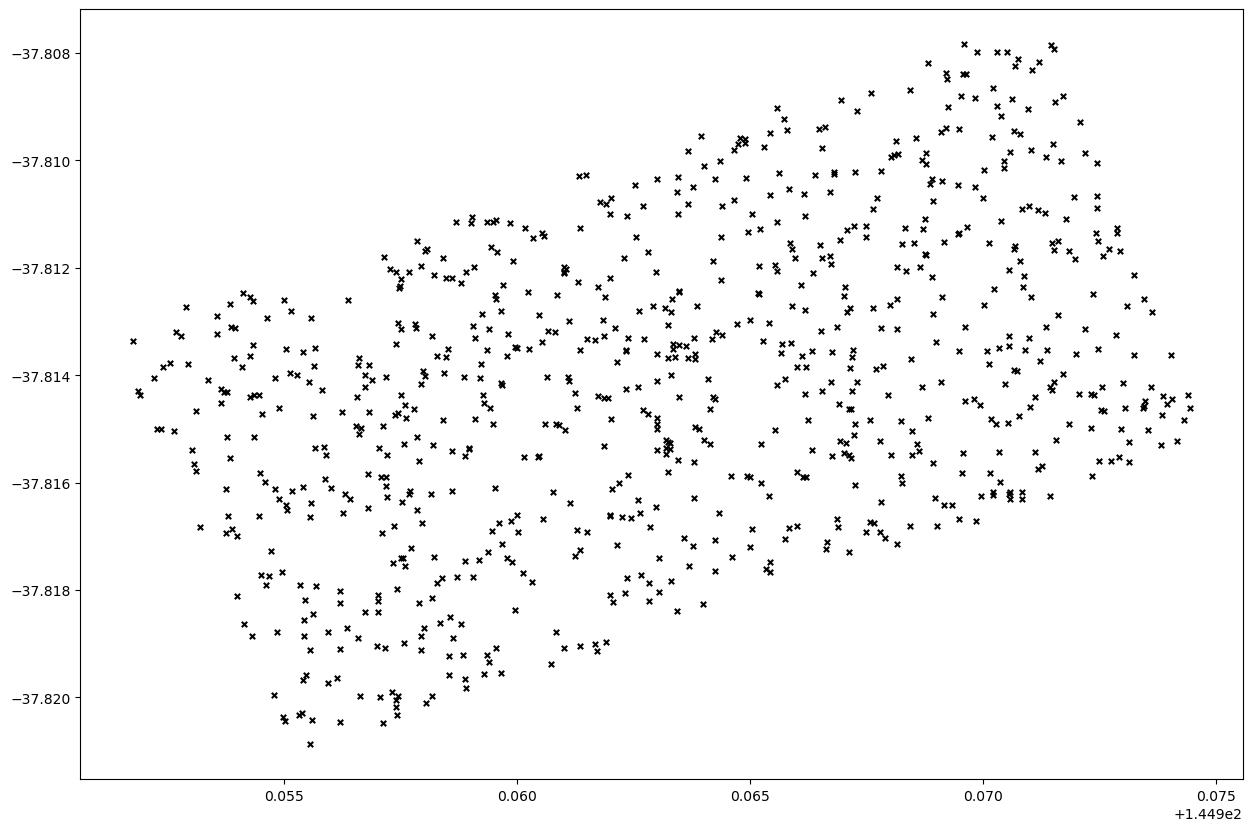

In [28]:
plt.figure(figsize=(15, 10))
plt.scatter(user.Longitude.to_numpy(), user.Latitude.to_numpy(), color='black', s=15, marker='x')
plt.show()

In [30]:
'''
1.每个用户都被本服务提供商覆盖;
2.每个基站覆盖多少用户/邻居基站多少;
'''
latitude=user.Latitude.to_numpy()
longitude=user.Longitude.to_numpy()

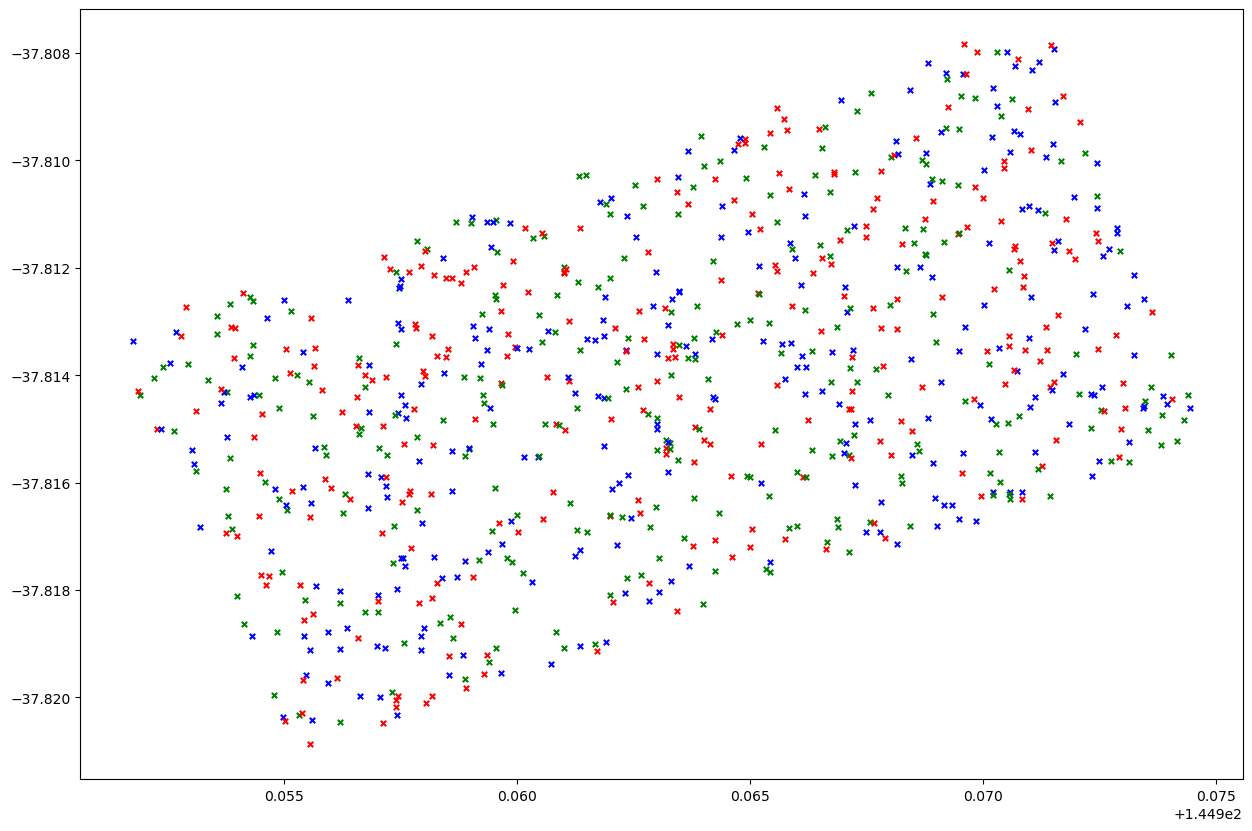

In [37]:
plt.figure(figsize=(15, 10))
for i in np.arange(len(latitude)):
    if i%3==1:
        plt.scatter(longitude[i], latitude[i], color='red', s=15, marker='x')
    elif i%3==2:
        plt.scatter(longitude[i], latitude[i], color='green', s=15, marker='x')
    else:
        plt.scatter(longitude[i], latitude[i], color='blue', s=15, marker='x')
plt.show()

In [38]:
for i in np.arange(len(latitude)):
    flag=False
    if i%3==1: #sub-1
        for j in sub_1:
            dis=geodesic((latitude[i], longitude[i]), result[j]).meters
            if dis<=1000:
                flag=True
                break
    elif i%3==2: #sub-6
        for j in sub_6:
            dis=geodesic((latitude[i], longitude[i]), result[j]).meters
            if dis<=500:
                flag=True
                break
    else: #mmWave-24
        for j in mmWave_24:
            dis=geodesic((latitude[i], longitude[i]), result[j]).meters
            if dis<=250:
                flag=True
                break
    if flag==False:
        print(i)

In [50]:
node={}
for i in sub_1:
    userNum=0
    nodeNum=0
    flag=False
    for j in np.arange(len(latitude)):
        dis=geodesic(result[i], (latitude[j], longitude[j])).meters
        if dis<=1000:
            if j%3==1:
                flag=True
            userNum=userNum+1
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=1000:
            nodeNum=nodeNum+1
    print(i, "->", (userNum, nodeNum), flag)
    if len(list(G['cross-net'].successors(i))) != nodeNum:
        print(i, "Error!")
        break
    node[i]=np.array([userNum, nodeNum])
print(len(node))
print("===============")
for i in sub_6:
    userNum=0
    nodeNum=0
    flag=False
    for j in np.arange(len(latitude)):
        dis=geodesic(result[i], (latitude[j], longitude[j])).meters
        if dis<=500:
            if j%3==2:
                flag=True
            userNum=userNum+1
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=500:
            nodeNum=nodeNum+1
    print(i, "->", (userNum, nodeNum), flag)
    if len(list(G['cross-net'].successors(i))) != nodeNum:
        print(i, "Error!")
        break
    node[i]=np.array([userNum, nodeNum])
print(len(node))
print("===============")
for i in mmWave_24:
    userNum=0
    nodeNum=0
    flag=False
    for j in np.arange(len(latitude)):
        dis=geodesic(result[i], (latitude[j], longitude[j])).meters
        if dis<=250:
            if j%3==0:
                flag=True
            userNum=userNum+1
    for j in np.arange(125):
        if i==j:
            continue
        dis=geodesic(result[i], result[j]).meters
        if dis<=250:
            nodeNum=nodeNum+1
    print(i, "->", (userNum, nodeNum), flag)
    if len(list(G['cross-net'].successors(i))) != nodeNum:
        print(i, "Error!")
        break
    node[i]=np.array([userNum, nodeNum])
print(len(node))

30 -> (727, 108) True
89 -> (505, 81) True
52 -> (544, 84) True
57 -> (702, 104) True
93 -> (457, 62) True
53 -> (726, 114) True
1 -> (422, 69) True
56 -> (604, 92) True
12 -> (503, 74) True
116 -> (524, 74) True
38 -> (465, 74) True
50 -> (480, 62) True
86 -> (453, 62) True
76 -> (715, 103) True
84 -> (384, 62) True
28 -> (754, 113) True
22 -> (718, 109) True
98 -> (569, 89) True
18
103 -> (229, 27) True
54 -> (319, 54) True
108 -> (237, 36) True
45 -> (337, 51) True
95 -> (344, 54) True
36 -> (358, 56) True
58 -> (224, 36) True
14 -> (301, 49) True
6 -> (185, 21) True
11 -> (182, 28) True
0 -> (107, 21) True
96 -> (234, 35) True
88 -> (356, 55) True
25 -> (172, 34) True
104 -> (259, 27) True
113 -> (189, 40) True
80 -> (354, 55) True
81 -> (138, 15) True
94 -> (225, 46) True
7 -> (334, 53) True
31 -> (363, 46) True
92 -> (116, 23) True
115 -> (176, 26) True
39 -> (294, 47) True
21 -> (300, 38) True
72 -> (283, 30) True
4 -> (228, 42) True
9 -> (315, 51) True
105 -> (217, 25) True
85 

In [51]:
node

{30: array([727, 108]),
 89: array([505,  81]),
 52: array([544,  84]),
 57: array([702, 104]),
 93: array([457,  62]),
 53: array([726, 114]),
 1: array([422,  69]),
 56: array([604,  92]),
 12: array([503,  74]),
 116: array([524,  74]),
 38: array([465,  74]),
 50: array([480,  62]),
 86: array([453,  62]),
 76: array([715, 103]),
 84: array([384,  62]),
 28: array([754, 113]),
 22: array([718, 109]),
 98: array([569,  89]),
 103: array([229,  27]),
 54: array([319,  54]),
 108: array([237,  36]),
 45: array([337,  51]),
 95: array([344,  54]),
 36: array([358,  56]),
 58: array([224,  36]),
 14: array([301,  49]),
 6: array([185,  21]),
 11: array([182,  28]),
 0: array([107,  21]),
 96: array([234,  35]),
 88: array([356,  55]),
 25: array([172,  34]),
 104: array([259,  27]),
 113: array([189,  40]),
 80: array([354,  55]),
 81: array([138,  15]),
 94: array([225,  46]),
 7: array([334,  53]),
 31: array([363,  46]),
 92: array([116,  23]),
 115: array([176,  26]),
 39: array([29

In [52]:
with open(r'outData/node.pkl', 'wb') as file:
    pickle.dump(node, file)

In [53]:
'''
终端用户:用户ID->[[节点ID,节点类型,节点距离]];
sub-1:i%3=1;
sub-6:i%3=2;
mmWave-24:i%3=0;
'''
dic={}
for i in np.arange(len(latitude)):
    ndList=[]
    index=(latitude[i], longitude[i])
    #print(index)
    for s1 in sub_1:
        dis=geodesic(index, result[s1]).meters
        if dis<=1000:
            #print(s1, 1, int(dis))
            ndList.append(np.array([s1, 1, int(dis)]))
    for s6 in sub_6:
        dis=geodesic(index, result[s6]).meters
        if dis<=500:
            ndList.append(np.array([s6, 6, int(dis)]))
    for s24 in mmWave_24:
        dis=geodesic(index, result[s24]).meters
        if dis<=250:
            ndList.append(np.array([s24, 24, int(dis)]))
    dic[i]=np.array(ndList)
dic

{0: array([[ 52,   1, 369],
        [ 93,   1, 146],
        [ 53,   1, 835],
        [ 12,   1, 222],
        [116,   1, 629],
        [ 50,   1, 549],
        [ 86,   1, 378],
        [ 22,   1, 902],
        [108,   6, 269],
        [  0,   6,  67],
        [ 92,   6,  63],
        [115,   6, 356],
        [ 21,   6, 430],
        [ 23,  24, 209],
        [ 87,  24, 147],
        [ 27,  24, 246],
        [ 34,  24, 167],
        [109,  24, 246]]),
 1: array([[ 52,   1, 625],
        [ 93,   1, 624],
        [ 53,   1, 527],
        [ 12,   1, 472],
        [116,   1,  54],
        [ 50,   1,  72],
        [ 86,   1, 245],
        [ 76,   1, 966],
        [ 28,   1, 742],
        [ 22,   1, 514],
        [103,   6,  56],
        [108,   6, 393],
        [  6,   6, 178],
        [ 81,   6, 171],
        [ 31,   6, 357],
        [ 21,   6, 221],
        [101,  24,  90],
        [106,  24, 240],
        [ 66,  24, 218],
        [ 75,  24, 147],
        [ 74,  24,  34]]),
 2: array([[ 30

In [54]:
with open(r'outData/user.pkl', 'wb') as file:
    pickle.dump(dic, file)

In [57]:
with open(r'outData/user.pkl', 'rb') as file:
    user = pickle.load(file)
with open(r'outData/node.pkl', 'rb') as file:
    node = pickle.load(file)

In [56]:
user

{0: array([[ 52,   1, 369],
        [ 93,   1, 146],
        [ 53,   1, 835],
        [ 12,   1, 222],
        [116,   1, 629],
        [ 50,   1, 549],
        [ 86,   1, 378],
        [ 22,   1, 902],
        [108,   6, 269],
        [  0,   6,  67],
        [ 92,   6,  63],
        [115,   6, 356],
        [ 21,   6, 430],
        [ 23,  24, 209],
        [ 87,  24, 147],
        [ 27,  24, 246],
        [ 34,  24, 167],
        [109,  24, 246]]),
 1: array([[ 52,   1, 625],
        [ 93,   1, 624],
        [ 53,   1, 527],
        [ 12,   1, 472],
        [116,   1,  54],
        [ 50,   1,  72],
        [ 86,   1, 245],
        [ 76,   1, 966],
        [ 28,   1, 742],
        [ 22,   1, 514],
        [103,   6,  56],
        [108,   6, 393],
        [  6,   6, 178],
        [ 81,   6, 171],
        [ 31,   6, 357],
        [ 21,   6, 221],
        [101,  24,  90],
        [106,  24, 240],
        [ 66,  24, 218],
        [ 75,  24, 147],
        [ 74,  24,  34]]),
 2: array([[ 30

In [59]:
'''
user:用户ID->[[基站ID, 服务商ID(1,6,24), 距离],...];
node:基站ID->[覆盖用户数, 邻居基站数](均不区分服务提供商);
'''
lst=[0 for i in np.arange(125)]
for key in user:
    for nd in user[key]:
        lst[nd[0]]+=1
for key in node:
    if node[key][0]!=lst[key]:
        print("error===========")
        break
    print(node[key][0], lst[key])

727 727
505 505
544 544
702 702
457 457
726 726
422 422
604 604
503 503
524 524
465 465
480 480
453 453
715 715
384 384
754 754
718 718
569 569
229 229
319 319
237 237
337 337
344 344
358 358
224 224
301 301
185 185
182 182
107 107
234 234
356 356
172 172
259 259
189 189
354 354
138 138
225 225
334 334
363 363
116 116
176 176
294 294
300 300
283 283
228 228
315 315
217 217
159 159
93 93
370 370
287 287
246 246
286 286
291 291
89 89
93 93
48 48
54 54
71 71
54 54
50 50
85 85
89 89
95 95
47 47
94 94
79 79
46 46
80 80
43 43
82 82
47 47
95 95
62 62
46 46
97 97
83 83
80 80
88 88
48 48
56 56
80 80
40 40
82 82
103 103
94 94
98 98
63 63
55 55
102 102
100 100
74 74
68 68
98 98
83 83
90 90
42 42
103 103
100 100
68 68
46 46
84 84
72 72
70 70
74 74
74 74
63 63
80 80
90 90
85 85
91 91
74 74
99 99
62 62
91 91
84 84
81 81
84 84
81 81
47 47
88 88
91 91
32 32
115 115
90 90


In [60]:
node

{30: array([727, 108]),
 89: array([505,  81]),
 52: array([544,  84]),
 57: array([702, 104]),
 93: array([457,  62]),
 53: array([726, 114]),
 1: array([422,  69]),
 56: array([604,  92]),
 12: array([503,  74]),
 116: array([524,  74]),
 38: array([465,  74]),
 50: array([480,  62]),
 86: array([453,  62]),
 76: array([715, 103]),
 84: array([384,  62]),
 28: array([754, 113]),
 22: array([718, 109]),
 98: array([569,  89]),
 103: array([229,  27]),
 54: array([319,  54]),
 108: array([237,  36]),
 45: array([337,  51]),
 95: array([344,  54]),
 36: array([358,  56]),
 58: array([224,  36]),
 14: array([301,  49]),
 6: array([185,  21]),
 11: array([182,  28]),
 0: array([107,  21]),
 96: array([234,  35]),
 88: array([356,  55]),
 25: array([172,  34]),
 104: array([259,  27]),
 113: array([189,  40]),
 80: array([354,  55]),
 81: array([138,  15]),
 94: array([225,  46]),
 7: array([334,  53]),
 31: array([363,  46]),
 92: array([116,  23]),
 115: array([176,  26]),
 39: array([29

In [61]:
user

{0: array([[ 52,   1, 369],
        [ 93,   1, 146],
        [ 53,   1, 835],
        [ 12,   1, 222],
        [116,   1, 629],
        [ 50,   1, 549],
        [ 86,   1, 378],
        [ 22,   1, 902],
        [108,   6, 269],
        [  0,   6,  67],
        [ 92,   6,  63],
        [115,   6, 356],
        [ 21,   6, 430],
        [ 23,  24, 209],
        [ 87,  24, 147],
        [ 27,  24, 246],
        [ 34,  24, 167],
        [109,  24, 246]]),
 1: array([[ 52,   1, 625],
        [ 93,   1, 624],
        [ 53,   1, 527],
        [ 12,   1, 472],
        [116,   1,  54],
        [ 50,   1,  72],
        [ 86,   1, 245],
        [ 76,   1, 966],
        [ 28,   1, 742],
        [ 22,   1, 514],
        [103,   6,  56],
        [108,   6, 393],
        [  6,   6, 178],
        [ 81,   6, 171],
        [ 31,   6, 357],
        [ 21,   6, 221],
        [101,  24,  90],
        [106,  24, 240],
        [ 66,  24, 218],
        [ 75,  24, 147],
        [ 74,  24,  34]]),
 2: array([[ 30

In [4]:
import pickle
import numpy as np

with open(r'outData/node.pkl', 'rb') as file:
    node = pickle.load(file)

In [3]:
userNum=[]
for key in node:
    print(key, node[key])
    userNum.append(node[key][0])

30 [727 108]
89 [505  81]
52 [544  84]
57 [702 104]
93 [457  62]
53 [726 114]
1 [422  69]
56 [604  92]
12 [503  74]
116 [524  74]
38 [465  74]
50 [480  62]
86 [453  62]
76 [715 103]
84 [384  62]
28 [754 113]
22 [718 109]
98 [569  89]
103 [229  27]
54 [319  54]
108 [237  36]
45 [337  51]
95 [344  54]
36 [358  56]
58 [224  36]
14 [301  49]
6 [185  21]
11 [182  28]
0 [107  21]
96 [234  35]
88 [356  55]
25 [172  34]
104 [259  27]
113 [189  40]
80 [354  55]
81 [138  15]
94 [225  46]
7 [334  53]
31 [363  46]
92 [116  23]
115 [176  26]
39 [294  47]
21 [300  38]
72 [283  30]
4 [228  42]
9 [315  51]
105 [217  25]
85 [159  19]
37 [93 14]
63 [370  44]
107 [287  50]
17 [246  45]
79 [286  49]
26 [291  49]
32 [89 13]
55 [93 10]
124 [48  6]
118 [54  5]
101 [71  7]
3 [54  6]
106 [50 10]
97 [85 21]
66 [89 14]
19 [95  7]
68 [47 10]
13 [94  9]
122 [79 20]
70 [46  8]
23 [80 13]
59 [43  7]
15 [82 13]
47 [47  7]
10 [95 14]
87 [62 13]
102 [46  9]
65 [97 13]
29 [83 10]
2 [80 15]
73 [88 12]
5 [48  5]
75 [56  7

In [5]:
userNum

array([727, 505, 544, 702, 457, 726, 422, 604, 503, 524, 465, 480, 453,
       715, 384, 754, 718, 569, 229, 319, 237, 337, 344, 358, 224, 301,
       185, 182, 107, 234, 356, 172, 259, 189, 354, 138, 225, 334, 363,
       116, 176, 294, 300, 283, 228, 315, 217, 159,  93, 370, 287, 246,
       286, 291,  89,  93,  48,  54,  71,  54,  50,  85,  89,  95,  47,
        94,  79,  46,  80,  43,  82,  47,  95,  62,  46,  97,  83,  80,
        88,  48,  56,  80,  40,  82, 103,  94,  98,  63,  55, 102, 100,
        74,  68,  98,  83,  90,  42, 103, 100,  68,  46,  84,  72,  70,
        74,  74,  63,  80,  90,  85,  91,  74,  99,  62,  91,  84,  81,
        84,  81,  47,  88,  91,  32, 115,  90])

In [4]:
userNum=np.array(userNum)
np.max(userNum)

754

In [6]:
np.min(userNum)

32

In [7]:
np.mean(userNum)

198.016

In [8]:
np.median(userNum)

97.0

In [3]:
nodeNum=[]
for key in node:
    print(key, node[key])
    nodeNum.append(node[key][1])

30 [727 108]
89 [505  81]
52 [544  84]
57 [702 104]
93 [457  62]
53 [726 114]
1 [422  69]
56 [604  92]
12 [503  74]
116 [524  74]
38 [465  74]
50 [480  62]
86 [453  62]
76 [715 103]
84 [384  62]
28 [754 113]
22 [718 109]
98 [569  89]
103 [229  27]
54 [319  54]
108 [237  36]
45 [337  51]
95 [344  54]
36 [358  56]
58 [224  36]
14 [301  49]
6 [185  21]
11 [182  28]
0 [107  21]
96 [234  35]
88 [356  55]
25 [172  34]
104 [259  27]
113 [189  40]
80 [354  55]
81 [138  15]
94 [225  46]
7 [334  53]
31 [363  46]
92 [116  23]
115 [176  26]
39 [294  47]
21 [300  38]
72 [283  30]
4 [228  42]
9 [315  51]
105 [217  25]
85 [159  19]
37 [93 14]
63 [370  44]
107 [287  50]
17 [246  45]
79 [286  49]
26 [291  49]
32 [89 13]
55 [93 10]
124 [48  6]
118 [54  5]
101 [71  7]
3 [54  6]
106 [50 10]
97 [85 21]
66 [89 14]
19 [95  7]
68 [47 10]
13 [94  9]
122 [79 20]
70 [46  8]
23 [80 13]
59 [43  7]
15 [82 13]
47 [47  7]
10 [95 14]
87 [62 13]
102 [46  9]
65 [97 13]
29 [83 10]
2 [80 15]
73 [88 12]
5 [48  5]
75 [56  7

In [5]:
nodeNum=np.array(nodeNum)
print(np.min(nodeNum), np.max(nodeNum), np.mean(nodeNum), np.median(nodeNum))

3 114 29.904 17.0
